In [1]:
from TTT3D import *

Version:  0.2.41


In [2]:
from tqdm.notebook import tqdm

In [3]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.ϵ=0.1  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [4]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.ϵ=0.1  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [5]:
Q1_agent.Q=Table()  # makes an empty table
Q2_agent.Q=Table()  # makes an empty table
SaveTable(Q1_agent.Q,"Q1_table_TTT3D.json")
SaveTable(Q2_agent.Q,"Q2_table_TTT3D.json")    

In [6]:
percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]
current_game_number=0

In [7]:
Q1_agent.Q=LoadTable("Q1_table_TTT3D.json")
Q2_agent.Q=LoadTable("Q2_table_TTT3D.json")

N_train=100
N_test=100


for i in tqdm(range(500)):
    
    Q1_agent.learning=Q2_agent.learning=True
    g=Game(number_of_games=N_train)  
    g.display=False
    g.run(Q1_agent,Q2_agent)

    current_game_number+=N_train
    
    Q1_agent.learning=Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(Q1_agent,random_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)
    
SaveTable(Q1_agent.Q,"Q1_table_TTT3D.json")
SaveTable(Q2_agent.Q,"Q2_table_TTT3D.json")    
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel,imshow,cm,axis
import matplotlib.pylab as plt

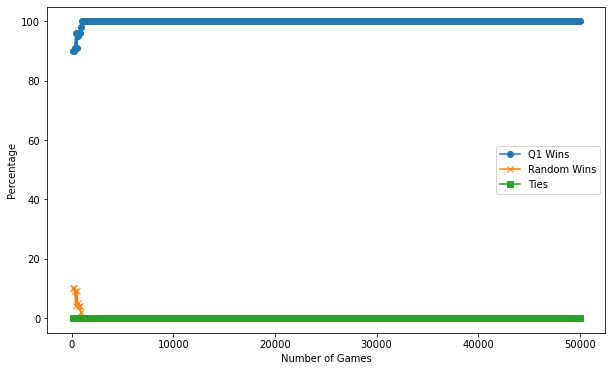

In [9]:
figure(figsize=(10,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Q1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Random Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()

In [27]:
from Game.minimax import *
def minimax_move(state,player):
    values,moves=minimax_values(state,player,maxdepth=8,display=True)
    return top_choice(moves,values)
minimax_agent=Agent(minimax_move)


In [28]:
g=Game(number_of_games=1)
g.display=False
results=g.run(minimax_agent,minimax_agent)
results

  Choice Time: 0.001688241958618164 seconds 
  Choice Time: 0.0013949871063232422 seconds 
  Choice Time: 0.001138925552368164 seconds 


[1]

In [31]:
g=Game(number_of_games=1)
g.display=False
results=g.run(Q1_agent,minimax_agent)
results

  Choice Time: 0.0006091594696044922 seconds 
  Choice Time: 0.0313410758972168 seconds 


[1]

In [32]:
g=Game(number_of_games=1)
g.display=False
results=g.run(minimax_agent,Q2_agent)
results

  Choice Time: 0.0007147789001464844 seconds 
  Choice Time: 0.055615901947021484 seconds 
  Choice Time: 0.009109973907470703 seconds 
  Choice Time: 0.001194000244140625 seconds 
  Choice Time: 8.130073547363281e-05 seconds 


[1]

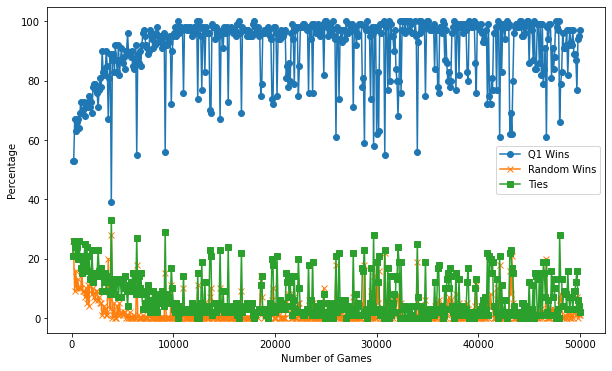

- At 50000
    - minimax vs minimax = P1 wins
    - Q1 vs minimax = tie
    - minimax vs Q2 = P1 wins
- At 100000
    - minimax vs minimax = P1 wins
    - Q1 vs minimax = tie
    - minimax vs Q2 = P1 wins
- At 150000
    - minimax vs minimax = P1 wins
    - Q1 vs minimax = tie
    - minimax vs Q2 = P1 wins
